# ML-assignment 3

## Part 0
* Hospital/bank/customer customer service - how many males/females are calling
* 

### Streaming
* Yes, with the proper data preprocessing it would be possible. We only need to extract the chosen features. We would probably have to extract only the last small part (maybe 1 second) the data in order to identify the gender of the person currently talking. However this would probably only work with one person talking at a time.

# Part 1


In [169]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


C:\Users\sarke\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [170]:
data_url = "https://raw.githubusercontent.com/OnkelDunkel/MLAssignment2/master/voice.csv"
df = pd.read_csv(data_url)

In [171]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


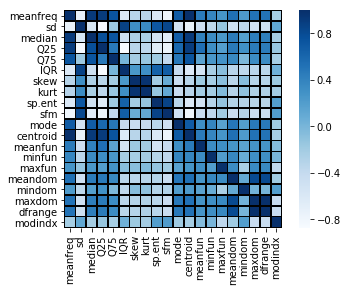

In [172]:
sns.heatmap(df.corr(),linewidths=0.50,vmax=1.0, square=True, cmap="Blues", linecolor='black')

### Do we see correlations in feature space?
* SD (standard deviation of frequency), IQR, skew, kurt, spectral entropy (sp.ent), sectral flatness (sfm) and modinx (modulation index) are statistical numbers. As seen in the correlation matrix they have little correlation with all other features in the dataset. This means that we might be able to remove those feature to increase performance and maybe achieve a better classification.

In [173]:
df.isnull().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

In [174]:
df.label.value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [175]:
df.label = np.where(df.label.values == 'female', 1, 0)
df.label.value_counts()

1    1584
0    1584
Name: label, dtype: int64

df.columns

In [176]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [177]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [178]:
# Split Pandas Frame in features...
x = df.iloc[:,0:-1]
#...and label.
y = df.iloc[:,-1]

# Scale the data (which means scaling the extremes, namely -- for 'voices.csv' -- the skewness and curtosis)
scaler = MinMaxScaler(feature_range=(0., 1.))
x = scaler.fit_transform(x)

# Re-define labels as '0' or '1', rather than 'male' or 'female'
label = LabelEncoder()
y = label.fit_transform(y)
    

In [179]:

type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [180]:
# Split that data in training set and testing (validation) set (using scikit-learn lib.).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check shapes
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2534, 20), (2534,), (634, 20), (634,))

In [181]:
# Check x_train's type
type(x_train), type(x_train)

(numpy.ndarray, numpy.ndarray)

In [182]:
x_train_flat = x_train
x_test_flat = x_test

In [183]:
x_train_flat.shape, x_test_flat.shape, y_train.shape, y_test.shape

((2534, 20), (634, 20), (2534,), (634,))

In [184]:
type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray)

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score


In [185]:
from keras import models
from keras import layers


print(x_train_flat.shape[1])

model = models.Sequential([
  layers.Dense(128, activation='relu', input_shape= (x_train_flat.shape[1],) ),
  layers.Dropout(0.2),
  layers.Dense(2, activation='sigmoid')
])

20


In [186]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [187]:
model.fit(x_train_flat, y_train, epochs=100)

Epoch 1/100
2534/2534 [==============================] - 0s 141us/step - loss: 0.6321 - acc: 0.6531
Epoch 2/100
2534/2534 [==============================] - 0s 47us/step - loss: 0.4653 - acc: 0.8232
Epoch 3/100
2534/2534 [==============================] - 0s 38us/step - loss: 0.3381 - acc: 0.8879
Epoch 4/100
2534/2534 [==============================] - 0s 38us/step - loss: 0.2432 - acc: 0.9337
Epoch 5/100
2534/2534 [==============================] - 0s 40us/step - loss: 0.1909 - acc: 0.9495
Epoch 6/100
2534/2534 [==============================] - 0s 43us/step - loss: 0.1680 - acc: 0.9463
Epoch 7/100
2534/2534 [==============================] - 0s 45us/step - loss: 0.1395 - acc: 0.9613
Epoch 8/100
2534/2534 [==============================] - 0s 42us/step - loss: 0.1329 - acc: 0.9625
Epoch 9/100
2534/2534 [==============================] - 0s 46us/step - loss: 0.1228 - acc: 0.9645
Epoch 10/100
2534/2534 [==============================] - 0s 40us/step - loss: 0.1149 - acc: 0.9684
Epoch 11

2534/2534 [==============================] - 0s 61us/step - loss: 0.0578 - acc: 0.9799
Epoch 83/100
2534/2534 [==============================] - 0s 69us/step - loss: 0.0555 - acc: 0.9822
Epoch 84/100
2534/2534 [==============================] - 0s 65us/step - loss: 0.0612 - acc: 0.9783
Epoch 85/100
2534/2534 [==============================] - 0s 45us/step - loss: 0.0581 - acc: 0.9799
Epoch 86/100
2534/2534 [==============================] - 0s 51us/step - loss: 0.0566 - acc: 0.9791
Epoch 87/100
2534/2534 [==============================] - 0s 44us/step - loss: 0.0567 - acc: 0.9818
Epoch 88/100
2534/2534 [==============================] - 0s 47us/step - loss: 0.0585 - acc: 0.9807
Epoch 89/100
2534/2534 [==============================] - 0s 47us/step - loss: 0.0584 - acc: 0.9787
Epoch 90/100
2534/2534 [==============================] - 0s 50us/step - loss: 0.0605 - acc: 0.9767
Epoch 91/100
2534/2534 [==============================] - 0s 70us/step - loss: 0.0547 - acc: 0.9818
Epoch 92/100


In [188]:
model.evaluate(x_test_flat, y_test)

634/634 [==============================] - 0s 207us/step


[0.06355679517006649, 0.9747634058118995]

In [163]:
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=16, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(16, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(1, kernel_initializer = 'normal', activation='sigmoid'))
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [164]:
create_model

<function __main__.create_model()>

In [165]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
estimator = KerasClassifier(build_fn =create_model, epochs = 100, verbose = 0)
#cv_scores = cross_val_score(estimator,all_features,all_classes, cv=10)
cv_scores = cross_val_score(estimator,x,y_, cv=10)
cv_scores.mean()



ValueError: Found input variables with inconsistent numbers of samples: [3168, 1]

##  Univariate Feature Selection

Univariate feature selection selects the best features by running univariate statistical tests like chi-squared test, F-1 test, and mutual information methods.

In [166]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

test = SelectKBest(score_func=chi2, k=2)
test.fit(x, y)

SelectKBest(k=2, score_func=<function chi2 at 0x000001DB79B8B378>)

In [167]:
scores = []
num_features = len(x.columns)
for i in range(num_features):
    score = test.scores_[i]
    #scores.append((score, x.columns[i]))
        
print (sorted(scores, reverse = True))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [168]:

print_best_worst(scores)


The 5 best features selected by this method are :


IndexError: list index out of range